# K-Mean Clustering
K-means clustering is an unsupervised learning algorithm that is used to group similar data points together. It is a popular algorithm for clustering data and is used in a variety of applications, such as image segmentation, customer segmentation, and anomaly detection.

K-means clustering in beginner-friendly terms:

What is K-means clustering?
K-means clustering is an unsupervised machine learning algorithm used to automatically group or cluster similar data points together.

How does it work?
K-means clustering works by defining ‘K’ number of clusters or groups ahead of time. The algorithm then assigns each data point to one of these K clusters based on feature similarity. The features could be things like age, income, spending habits etc.

It then calculates the ‘center’ of each cluster. This is called the centroid. Next it recalculates cluster membership by finding which cluster center each point is closest to. This process repeats until the membership assignments no longer change.

Why use K-means clustering?
The main reasons to use K-means clustering are:

    Grouping Data: It automatically organizes unlabeled data points into meaningful clusters or groups.

    Pattern Recognition: Clustering helps recognize hidden patterns in unstructured data and gain insights.

    Data Segmentation: Identifying distinct groups in data allows treating each segment differently for tasks like targeting customers.

    Data Compression: Cluster IDs can replace raw data for storing, visualizing or processing large datasets.

How is it applied?
K-means clustering is commonly used for customer segmentation, image recognition, compiler optimization, gene expression analysis and more. It works best with numerical data and when you have a general idea of ‘K’ clusters to aim for.

In summary, K-means clustering provides an automatic way to group messy data into organized, interpretable clusters based on similarities between data points.

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    confusion_matrix,
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
# import data
df = sns.load_dataset("titanic")

# deal with missing values
df["age"].fillna(df["age"].mean(), inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_6548\3680896516.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)


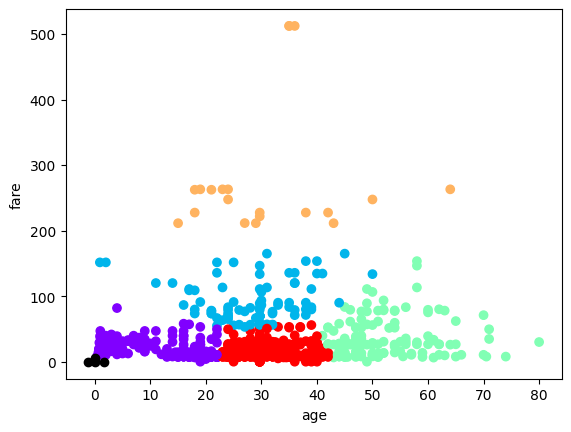

In [ ]:
# import model
from sklearn.cluster import KMeans

# import for normalization
from sklearn.preprocessing import StandardScaler

# import the data in features (normalizing the data)
x = df[["age", "fare"]]

# scaled data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# model the data

kmeans = KMeans(n_clusters=5)

# fit the model
kmeans.fit(x_scaled)

# assign the cluster labels to the data
df["cluster"] = kmeans.labels_

# plotting the graph
plt.scatter(df["age"], df["fare"], c=df["cluster"], cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="black")
# for cluster centers ie. the centroid of each cluster
plt.xlabel("age")
plt.ylabel("fare")
plt.show()

In [23]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,cluster
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0


In [24]:
df["cluster"].unique()

array([0, 1, 2, 4, 3])

C:\Users\user\AppData\Local\Temp\ipykernel_6548\997268130.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


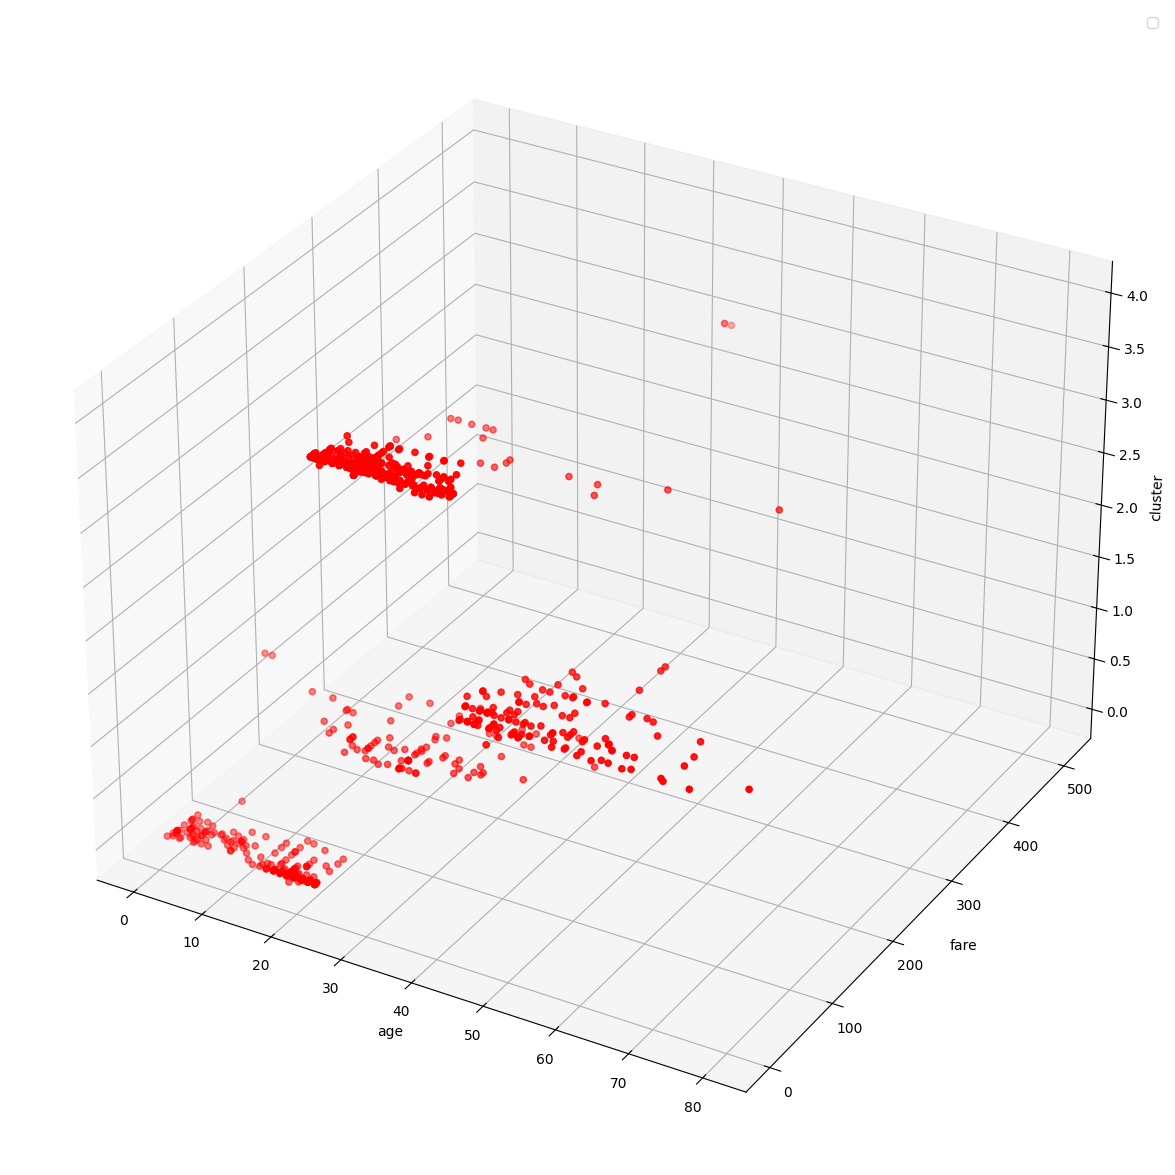

In [43]:
# 3D scatter plot
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection="3d")

# Scatter actual values
ax.scatter(df["age"], df["fare"], df["cluster"], color="red")


# Labels and legend
ax.set_xlabel("age")
ax.set_ylabel("fare")
ax.set_zlabel("cluster")
ax.legend()

plt.show()

In [48]:
import plotly.express as px

fig = px.scatter(df, x="age", y="fare", color="cluster")
fig.show()

In [53]:
import plotly.express as px

fig = px.scatter_3d(df, x="age", y="fare", z="survived", color="cluster")
fig.show()

In [54]:
import plotly.express as px

fig = px.parallel_coordinates(
    df,
    color="cluster",
    color_continuous_scale=px.colors.sequential.Inferno,
    title="Titnaic",
)
fig.show()